# Milestone3


Please put this notebook in the same folder as the training data and unzip the train.json

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import warnings 
import itertools
warnings.filterwarnings('ignore')

In [2]:
t = pd.read_json('train.json')

In [3]:
t.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [4]:
testing = pd.read_json('test.json')

In [5]:
testing.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place


### Remove outliers

In [6]:
t = t[t['price'] <= np.percentile(t['price'], 99)]
t = t[t['price'] >= np.percentile(t['price'],1)]

In [7]:
t = t[t['latitude'] <= np.percentile(t['latitude'], 99)]
t = t[t['latitude'] >= np.percentile(t['latitude'],1)]

In [8]:
t = t[t['longitude'] <= np.percentile(t['longitude'], 99)]
t = t[t['longitude'] >= np.percentile(t['longitude'],1)]

In [9]:
def outputCSV(predLabel):
    labels2idx = {'high': 0, 'low': 1, 'medium': 2}
    sub = pd.DataFrame()
    sub["listing_id"] = testing["listing_id"]
    for label in ["high", "medium", "low"]:
        sub[label] = predLable[:, labels2idx[label]]
    sub.to_csv("submission_rf.csv", index=False)

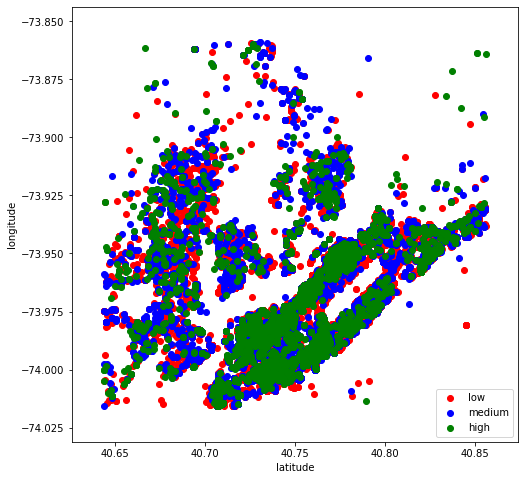

In [10]:
colors = itertools.cycle(["r", "b", "g"])
fig = plt.figure(figsize=(8,8))
for level in ['low', 'medium','high']:
    data = t[t['interest_level'] == level]
    lat = data['latitude']
    lon = data['longitude']
    plt.scatter(lat, lon, color=next(colors), label = level)
plt.legend()
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

### Features selection

#### 0.Naive features

In [11]:
featureSelect = ['bathrooms','bedrooms','latitude','longitude','price']

In [12]:
X_pred = testing[featureSelect]

In [13]:
X = t[featureSelect]

In [14]:
y = t['interest_level']

##### Random Forest

In [15]:
treeModel = RandomForestClassifier(n_estimators = 10, max_depth = 5, min_samples_leaf = 10)

In [16]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

In [17]:
-scores.mean()

0.7013757897336175

In [18]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
y_pred = treeModel.predict_proba(X)

In [20]:
log_loss(y,y_pred)

0.7016835687304473

In [21]:
predLable = treeModel.predict_proba(X_pred)

In [22]:
outputCSV(predLable)

Random Forest log loss = 0.71116

##### Gradient Boost

In [31]:
gbcModel = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [24]:
scores = cross_val_score(gbcModel,X, y, cv=10,scoring = 'neg_log_loss')

In [25]:
-scores.mean()

0.6669975238805609

In [26]:
gbcModel.fit(X,y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_

In [27]:
y_pred = gbcModel.predict_proba(X)

In [28]:
log_loss(y,y_pred)

0.6571690411757373

In [29]:
predLable = gbcModel.predict_proba(X_pred)

In [30]:
outputCSV(predLable)

Gradient Boost log loss: 0.67689

##### Naive Bayes

In [17]:
nbModel = make_pipeline(
    StandardScaler(),
    GaussianNB()
)
scores = cross_val_score(nbModel,X, y, cv=10,scoring = 'neg_log_loss')
-scores.mean()

0.8139106466055702

In [18]:
nbModel.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [19]:
y_pred = nbModel.predict_proba(X)
log_loss(y,y_pred)

0.8131455040549087

In [20]:
predLable = nbModel.predict_proba(X_pred)
outputCSV(predLable)

Naive Bayes log loss: 0.88510

#### 1.Tune parameters

##### Random Forest

In [24]:
n_range = [100,200,300,400,500,600]
cv_scores= []
for n in n_range:
    tree = RandomForestClassifier(n_estimators = n, max_depth = 5, min_samples_leaf = 10)
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')
    cv_scores.append(-scores.mean())

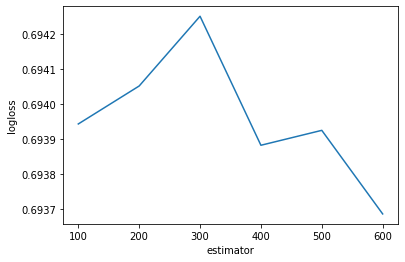

In [58]:
plt.plot(n_range,cv_scores)
plt.xlabel('estimator')
plt.ylabel('logloss')
plt.show()

In [49]:
bestScore = min(cv_scores)
bestIndex = -1
for index in range(6):
    if cv_scores[index] == bestScore:
        bestIndex = n_range[index]
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 600


In [50]:
treeModel = RandomForestClassifier(n_estimators = 600, max_depth = 5, min_samples_leaf = 10)

In [51]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred = treeModel.predict_proba(X)

In [53]:
log_loss(y,y_pred)

0.6907783639998787

In [54]:
predLable = treeModel.predict_proba(X_pred)

In [55]:
outputCSV(predLable)

Random Forest log loss = 0.70499

##### GradientBoost

In [15]:
n_range = [0.05,0.1,0.3,0.5,1]
cv_scores = []
for n in n_range:
    gbcModel = make_pipeline(
        StandardScaler(),
        GradientBoostingClassifier(learning_rate=n)
    )
    scores = cross_val_score(gbcModel,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(-scores.mean())

In [24]:
cv_scores

[0.6783779036745096,
 0.6669972475707245,
 0.655540518970457,
 0.6564158186151046,
 0.6742196403134335]

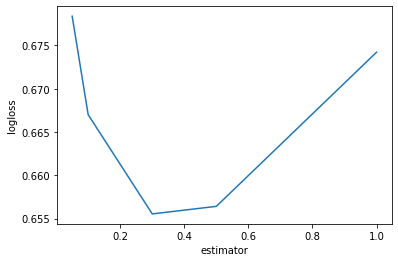

In [25]:
plt.plot(n_range,cv_scores)
plt.xlabel('learning_rate')
plt.ylabel('logloss')
plt.show()

From the graph we can know the best number of learning_rate is 0.3.

In [26]:
gbcModel = make_pipeline(
        StandardScaler(),
        GradientBoostingClassifier(learning_rate=0.3)
    )
gbcModel.fit(X,y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.3, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_

In [27]:
y_pred = gbcModel.predict_proba(X)
log_loss(y,y_pred)

0.6281163646546877

In [28]:
predLable = gbcModel.predict_proba(X_pred)
outputCSV(predLable)

Gradient Boost log loss: 0.67350

#### 2.More features

In [29]:
def date_to_month(d):
    d=pd.to_datetime(d)
    return d

In [30]:
date = np.vectorize(date_to_month)

In [31]:
t['dateTime'] = date(t['created'])
testing['dateTime'] = date(testing['created'])

In [32]:
t['year'] = t['dateTime'].dt.year
t['month'] = t['dateTime'].dt.month
t['day'] = t['dateTime'].dt.day
t['hour'] = t['dateTime'].dt.hour
t['minute'] = t['dateTime'].dt.minute

testing['year'] = testing['dateTime'].dt.year
testing['month'] = testing['dateTime'].dt.month
testing['day'] = testing['dateTime'].dt.day
testing['hour'] = testing['dateTime'].dt.hour
testing['minute'] = testing['dateTime'].dt.minute

In [33]:
featureSelect = featureSelect + ['year','month','day','hour','minute']

In [34]:
X_pred = testing[featureSelect]
X = t[featureSelect]
y = t['interest_level']

##### Random Forest

In [56]:
n_range = [100,200,300,400,500,600]
cv_scores= []
for n in n_range:
    tree = RandomForestClassifier(n_estimators = n, max_depth = 5, min_samples_leaf = 10)
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(-scores.mean())

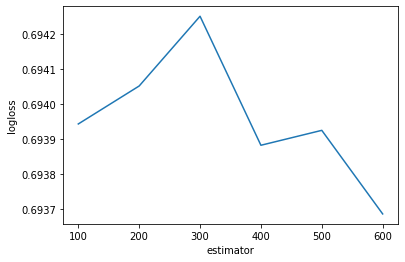

In [57]:
plt.plot(n_range,cv_scores)
plt.xlabel('estimator')
plt.ylabel('logloss')
plt.show()

In [59]:
bestScore = min(cv_scores)
bestIndex = -1
for index in range(6):
    if cv_scores[index] == bestScore:
        bestIndex = n_range[index]
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 600


In [30]:
treeModel = RandomForestClassifier(n_estimators = 600, max_depth = 5, min_samples_leaf = 1)

In [100]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

In [101]:
-scores.mean()

0.7247427793737204

In [102]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
y_pred = treeModel.predict_proba(X)
log_loss(y,y_pred)

0.7220020212271916

In [104]:
predLable = treeModel.predict_proba(X_pred)

In [105]:
outputCSV(predLable)

Funny thing: actually we use depth = 5 can achieve lower log loss compare with depth = 6 which is suggested by the cross validation.  
Random Forest logloss: 0.70465

##### GradientBoost

In [35]:
n_range = [0.05,0.1,0.3,0.5,1]
cv_scores = []
for n in n_range:
    gbcModel = make_pipeline(
        StandardScaler(),
        GradientBoostingClassifier(learning_rate=n)
    )
    scores = cross_val_score(gbcModel,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(-scores.mean())

In [36]:
cv_scores

[0.6578590601406737,
 0.6426969605046078,
 0.6288919059756222,
 0.6285126944036796,
 0.6694058168593016]

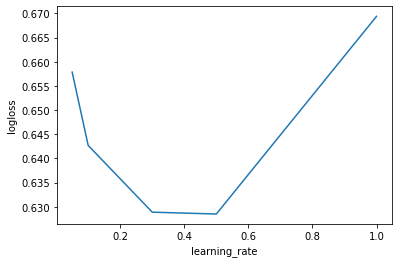

In [37]:
plt.plot(n_range,cv_scores)
plt.xlabel('learning_rate')
plt.ylabel('logloss')
plt.show()

From the graph we can know the best number of learning_rate is 0.5.

In [38]:
gbcModel = make_pipeline(
        StandardScaler(),
        GradientBoostingClassifier(learning_rate=0.5)
    )
gbcModel.fit(X,y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.5, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_

In [39]:
y_pred = gbcModel.predict_proba(X)
log_loss(y,y_pred)

0.5776773935195827

In [40]:
predLable = gbcModel.predict_proba(X_pred)
outputCSV(predLable)

Gradient Boost log loss: 0.65110

##### Naive Bayes

In [27]:
nbModel = make_pipeline(
    StandardScaler(),
    GaussianNB()
)
scores = cross_val_score(nbModel,X, y, cv=10,scoring = 'neg_log_loss')
-scores.mean()

0.8367045270579677

In [28]:
nbModel.fit(X,y)
y_pred = nbModel.predict_proba(X)
log_loss(y,y_pred)

0.8342803442730016

In [29]:
predLable = nbModel.predict_proba(X_pred)
outputCSV(predLable)

Naive Bayes log loss: 0.90537

#### 3.Add unstructured data

In [41]:
def list2str(list):
    return " ".join([i.replace(' ', '_') for i in list])

In [42]:
list2str = np.vectorize(list2str)

In [43]:
t['featuresStr'] = list2str(t['features'])
testing['featuresStr'] = list2str(testing['features'])

In [44]:
tf =  CountVectorizer(max_features=250, stop_words='english',max_df=0.6)
tr_sparse = tf.fit_transform(t["featuresStr"])
te_sparse = tf.transform(testing["featuresStr"])
X = sparse.hstack([t[featureSelect], tr_sparse])
X_pred = sparse.hstack([testing[featureSelect], te_sparse])

##### Random Forest

In [71]:
n_range = [400,500,600]
cv_scores= []
for n in n_range:
    tree = RandomForestClassifier(n_estimators = n, max_depth = 6, min_samples_leaf = 10)
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(-scores.mean())

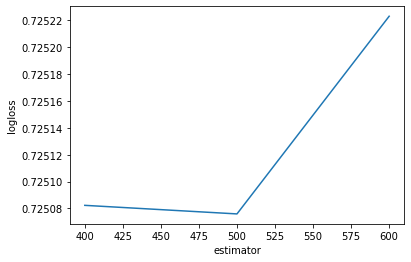

In [72]:
plt.plot(n_range,cv_scores)
plt.xlabel('estimator')
plt.ylabel('logloss')
plt.show()

In [73]:
bestScore = min(cv_scores)
bestIndex = -1
for index in range(3):
    if cv_scores[index] == bestScore:
        bestIndex = n_range[index]
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 500


In [93]:
treeModel = RandomForestClassifier(n_estimators = 500, max_depth = 6, min_samples_leaf = 1)

In [94]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')
-scores.mean()

0.7163449996870367

In [95]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
y_pred = treeModel.predict_proba(X)
log_loss(y,y_pred)

0.7125967395440331

In [97]:
predLable = treeModel.predict_proba(X_pred)

In [98]:
outputCSV(predLable)

Random Forest log loss: 0.73247

##### GradientBoost

In [46]:
n_range = [0.1,0.3,0.5,0.7,1]
cv_scores = []
for n in n_range:
    gbcModel = make_pipeline(
        MaxAbsScaler(),
        GradientBoostingClassifier(learning_rate=n)
    )
    scores = cross_val_score(gbcModel,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(-scores.mean())

In [47]:
cv_scores

[0.6150861987116989,
 0.5924887456546339,
 0.590448541033839,
 0.5963258917696719,
 0.6178973902279983]

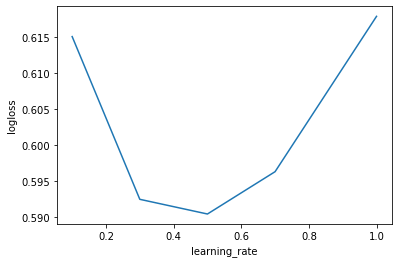

In [48]:
plt.plot(n_range,cv_scores)
plt.xlabel('learning_rate')
plt.ylabel('logloss')
plt.show()

From the graph we can know the best number of learning_rate is 0.5.

In [49]:
gbcModel = make_pipeline(
        MaxAbsScaler(),
        GradientBoostingClassifier(learning_rate=0.5)
    )
gbcModel.fit(X,y)

Pipeline(memory=None,
         steps=[('maxabsscaler', MaxAbsScaler(copy=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.5, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                       

In [50]:
y_pred = gbcModel.predict_proba(X)
log_loss(y,y_pred)

0.5344792089739013

In [51]:
predLable = gbcModel.predict_proba(X_pred)
outputCSV(predLable)

Gradient Boost log loss: 0.61673

##### Naive Bayes

In [37]:
from sklearn.naive_bayes import BernoulliNB
nbModel = make_pipeline(
    MaxAbsScaler(),
    BernoulliNB()
)
scores = cross_val_score(nbModel,X, y, cv=10,scoring = 'neg_log_loss')
-scores.mean()

0.842123423156967

In [38]:
nbModel.fit(X,y)
y_pred = nbModel.predict_proba(X)
log_loss(y,y_pred)

0.833094476472533

In [39]:
predLable = nbModel.predict_proba(X_pred)
outputCSV(predLable)

Naive Bayes log loss: 0.86621

#### Question 8  
We use "Accuracy" as our evaluation metric

In [89]:
k_range = range(1,15)
cv_scores = []
for n in k_range:
    tree =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'accuracy')  
    cv_scores.append(scores.mean())

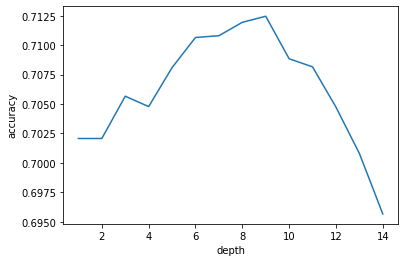

In [90]:
plt.plot(k_range,cv_scores)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.show()

In [93]:
bestScore = max(cv_scores)
bestIndex = -1
for index in range(1,15):
    if cv_scores[index - 1] == bestScore:
        bestIndex = index
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 9


In [103]:
treeModel = DecisionTreeClassifier(max_depth = 9)

In [95]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'accuracy')
scores.mean()

0.7124942551414489

In [104]:
treeModel.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [105]:
treeModel.score(X,y)

0.7434750827707787

In [97]:
predLable = treeModel.predict_proba(X_pred)

In [98]:
outputCSV(predLable)

Decision tree with ACCURACY, logloss: 1.02166